# Simple Logistic Regression

A systems analyst studied the effect of experience on ability to complete a complex task within a specified time.
The participants had varying amounts of experience measured in months as shown in the table below, where EX represents months of experience, and S is binary 0=FAIL, 1=SUCCESS

```
EX  S
14  0  
29  0  
 6  0  
25  1  
18  1  
 4  0  
18  0  
12  0  
22  1  
 6  0  
30  1  
11  0  
30  1  
 5  0  
20  1  
13  0  
 9  0  
32  1  
24  0  
13  1  
19  0  
 4  0  
28  1  
22  1  
 8  1  
```

Perform a logistic regression and estimate the experience required to ensure sucess with an empirical probability of 75 percent.

In [1]:
# Load the data
experience=[14,29,6,25,18,4,18,12,22,6,30,11,30,5,20,13,9,32,24,13,19,4,28,22,8]
result=[0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1]

Now lets plot the data and see what we can learn, later on we will need a model and data plot on same figure, so just build it here

In [2]:
# Load a Plotting Tool
import matplotlib.pyplot as plt
def make1plot(listx1,listy1,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,10)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=0) # basic data plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.grid(axis='y')
    plt.show()
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,10)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.grid(axis='y')
    plt.show()

Now plot the data

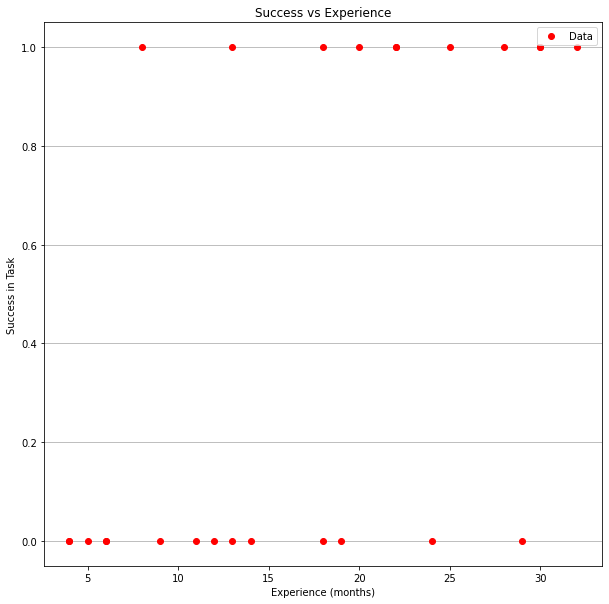

In [3]:
make1plot(experience,result,"Experience (months)","Success in Task","Success vs Experience")

Now a logistic model, we will need 3 prototype functions; a sigmoid function, an error function (here we use sum of squared error) and a merit function to minimize by changing $\beta_0$ and $\beta_1$.

The sigmoid function is

$$\pi_i = \frac{e^{\beta_0 + \beta_1 X_i}}{1+e^{\beta_0 + \beta_1 X_i}} $$


In [4]:
def pii(b0,b1,x): #sigmoidal function
    import math
    pii = math.exp(b0+b1*x)/(1+ math.exp(b0+b1*x))
    return(pii)

def sse(mod,obs): #compute sse from observations and model values
    howmany = len(mod)
    sse=0.0
    for i in range(howmany):
        sse=sse+(mod[i]-obs[i])**2
    return(sse)

def merit(beta): # merit function to minimize
    global result,experience #access lists already defined external to function
    mod=[0 for i in range(len(experience))]
    for i in range(len(experience)):
        mod[i]=pii(beta[0],beta[1],experience[i])
    merit = sse(mod,result)
    return(merit)

Now we attampt to minimize the merit function by changing values of $\beta$

In [5]:
beta = [-1,1] #initial guess of betas
merit(beta) #check that does not raise an exception

13.751653326406853

Good we obtained a value, and not an error, now an optimizer

In [6]:
import numpy as np
from scipy.optimize import minimize

x0 = np.array([-3.0597,0.1615])
res = minimize(merit, x0, method='powell',options={'disp': True})

Optimization terminated successfully.
         Current function value: 4.199781
         Iterations: 2
         Function evaluations: 60


Yay! It found some answer, examine and plot the findings

 b0 =  -3.008514542734867
 b1 =  0.1610365870854613


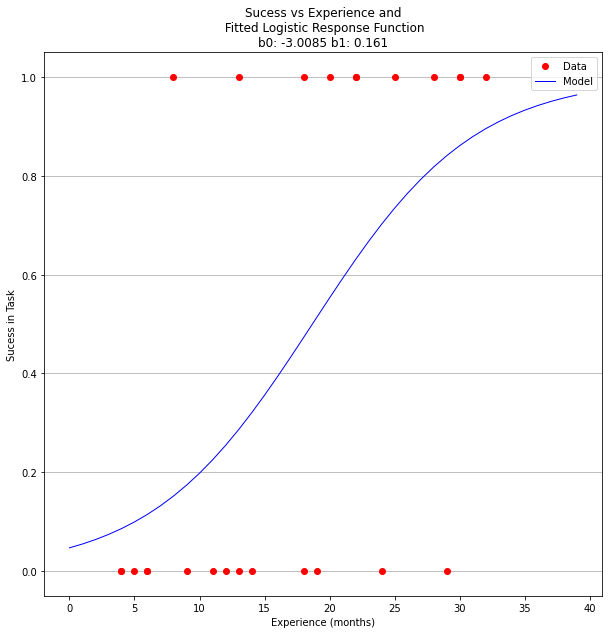

In [7]:
fitted=[0 for i in range(40)]
xaxis =[0 for i in range(40)]
for i in range(40):
    xaxis[i]=float(i)
    fitted[i]=pii(res.x[0],res.x[1],float(i))
    
print(" b0 = ",res.x[0])
print(" b1 = ",res.x[1])
plottitle = 'Sucess vs Experience and\n Fitted Logistic Response Function\n'+'b0: '+ str(round(res.x[0],4))+ ' b1: ' +str(round(res.x[1],4))
make2plot(experience,result,xaxis,fitted,'Experience (months)','Sucess in Task',plottitle)

Now to recover estimates of success for different experience levels

In [8]:
guess = 25.51
pii(res.x[0],res.x[1],guess)

0.7501718053379438

So we expect that someone with 25 months and 2 weeks experience would have a 75 percent chance of success.  Similarily the time to median success is 18 months and 3 weeks.

In [9]:
guess = 18.75
pii(res.x[0],res.x[1],guess)

0.50273033914023

Now using the same data, but a formal logistic package

In [10]:
# import the class
import numpy
from sklearn.linear_model import LogisticRegression
X = numpy.array(experience)
y = numpy.array(result)
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
# fit the model with data  -TRAIN the model
logreg.fit(X.reshape(-1, 1),y)

LogisticRegression(max_iter=10000)

In [11]:
logreg.coef_

array([[0.1608086]])

In [12]:
xplot = numpy.array(xaxis)
y_pred=logreg.predict(xplot.reshape(-1,1))

b0 = logreg.intercept_[0]
b1 = logreg.coef_[0][0]



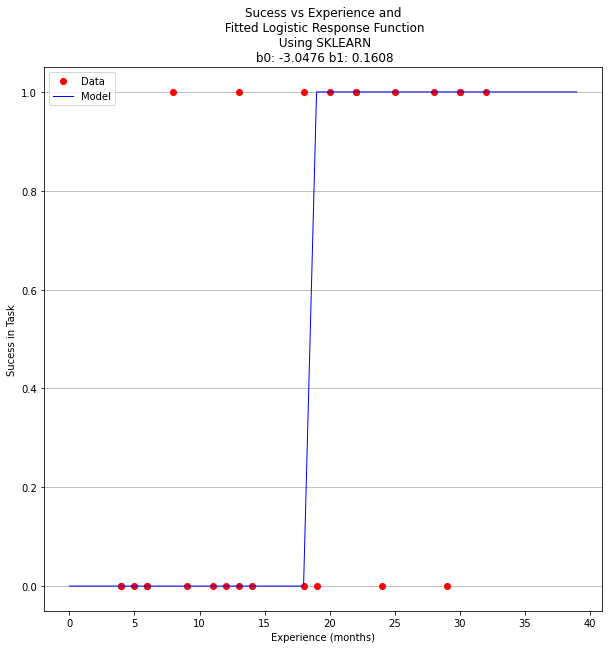

In [13]:
plottitle = 'Sucess vs Experience and\n Fitted Logistic Response Function\n Using SKLEARN\n '+'b0: '+ str(round(b0,4)) + ' b1: ' + str(round(b1,4))
make2plot(experience,result,xplot,y_pred,'Experience (months)','Sucess in Task',plottitle)

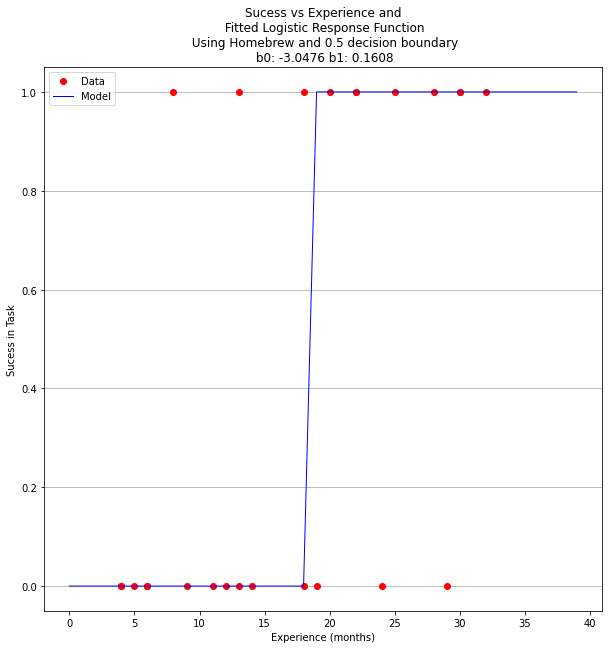

In [14]:
for i in range(40):
    xaxis[i]=float(i)
    fitted[i]=pii(b0,b1,float(i))
    if fitted[i] > 0.5:
        fitted[i] = 1.0
    else:
        fitted[i]=0.0

plottitle = 'Sucess vs Experience and\n Fitted Logistic Response Function\n Using Homebrew and 0.5 decision boundary\n '+'b0: '+ str(round(b0,4)) + ' b1: ' + str(round(b1,4))
make2plot(experience,result,xaxis,fitted,'Experience (months)','Sucess in Task',plottitle)